# Projekt: Predviđanje ocjena filmova na osnovu režisera, korištenjem Random Forest i Linear Regression modela

U ovom projektu korišten je dataset o filmovima, njihovim režiserima, ocjenama i drugim relevantnim podacima. Obavljeno je čišćenje podataka, upravljanje nedostajućim vrijednostima te primjena tehnika poput one-hot encodinga za kategorijske varijable. Korištenjem Random Forest Regressor i Linear Regression modela, uspoređene su stvarne i predviđene ocjene filmova, te optimiziran je model pomoću GridSearchCV za bolju preciznost.
***
**Autor**: Ajla Brdarević

**Predmet**: Poslovna inteligencija

Softversko inženjerstvo, Politehnički fakultet, Univerzitet u Zenici

Januar, 2025.

## Import potrebnih biblioteka
### Uvezeni moduli i njihove funkcije

1. **pandas** (`import pandas as pd`): 
   - Biblioteka za rad s podacima u tabličnom formatu (DataFrame). Omogućava učitavanje, manipulaciju i analizu podataka.

2. **numpy** (`import numpy as np`): 
   - Biblioteka za rad s numeričkim podacima i rad sa nizovima i matricama. Pruža mnoge funkcije za matematičke operacije i operacije na velikim količinama podataka.

3. **seaborn** (`import seaborn as sns`): 
   - Biblioteka za vizualizaciju podataka bazirana na `matplotlib`. Nudi visoko-nivelske funkcije za izradu atraktivnih i informativnih grafika.

4. **matplotlib.pyplot** (`import matplotlib.pyplot as plt`): 
   - Osnovna biblioteka za crtanje grafova u Pythonu. `pyplot` modul omogućava jednostavno crtanje linijskih grafikona, dijagrama i drugih vizualizacija.

5. **train_test_split, GridSearchCV** (`from sklearn.model_selection import train_test_split, GridSearchCV`): 
   - `train_test_split`: Funkcija koja omogućava podjelu podataka na trening i test skupove.
   - `GridSearchCV`: Funkcija koja se koristi za optimizaciju hiperparametara modela pretražujući sve moguće kombinacije parametara.

6. **RandomForestRegressor** (`from sklearn.ensemble import RandomForestRegressor`): 
   - Model baziran na Random Forest metodi za regresiju. Random Forest koristi skup stabala odluke za preciznije predikcije.

7. **LinearRegression** (`from sklearn.linear_model import LinearRegression`): 
   - Model linearne regresije koji pronalazi najbolju liniju koja minimizira greške između predviđenih i stvarnih vrijednosti.

8. **StandardScaler** (`from sklearn.preprocessing import StandardScaler`): 
   - Alat za standardizaciju podataka, koji prebacuje podatke na normalnu distribuciju sa srednjom vrijednošću 0 i standardnom devijacijom 1.

9. **mean_squared_error, r2_score, mean_absolute_error** (`from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error`): 
   - Metrike za evaluaciju modela:
     - `mean_squared_error`: Mjeri prosječnu kvadratnu grešku između stvarnih i predviđenih vrijednosti.
     - `r2_score`: Mjeri koliko dobro model objašnjava varijaciju u podacima.
     - `mean_absolute_error`: Mjeri prosječnu apsolutnu grešku između stvarnih i predviđenih vrijednosti.

10. **Pipeline** (`from sklearn.pipeline import Pipeline`): 
    - Alat za kreiranje nizova koraka u procesuiranju podataka i treniranju modela, olakšava primjenu svih tih koraka u jednom paketu.

11. **SimpleImputer** (`from sklearn.impute import SimpleImputer`): 
    - Alat za popunjavanje nedostajućih podataka u skupu podataka (npr. zamjena nedostajućih vrijednosti sa srednjom vrijednošću, medijanom, itd.).

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## === 1. Učitavanje podataka ===

1. **`directors`**:
   - Učitava CSV datoteku koja sadrži informacije o režiserima filmova. Podaci se učitavaju u DataFrame objekt pomoću `pd.read_csv('data/directors_202501211825.csv')`.

2. **`movies`**:
   - Učitava CSV datoteku koja sadrži informacije o filmovima. Ovaj DataFrame sadrži podatke o filmovima, uključujući naslove, godine izlaska, žanrove i druge relevantne informacije. Učitava se pomoću `pd.read_csv('data/movies_202501211826.csv')`.

3. **`movies2directors`**:
   - Ova CSV datoteka povezuje filmove s njihovim režiserima. Podaci se učitavaju u DataFrame pomoću `pd.read_csv('data/movies2directors_202501211826.csv')`, što omogućava stvaranje veza između filmova i njihovih autora.

4. **`ratings`**:
   - Učitava CSV datoteku koja sadrži ocjene filmova od strane korisnika. Podaci se učitavaju u DataFrame pomoću `pd.read_csv('data/ratings_202501211826.csv')`.

In [29]:
directors = pd.read_csv('data/directors_202501211825.csv')
movies = pd.read_csv('data/movies_202501211826.csv')
movies2directors = pd.read_csv('data/movies2directors_202501211826.csv')
ratings = pd.read_csv('data/ratings_202501211826.csv')

## === 2. Čišćenje podataka ===
### Provjera i uklanjanje nedostajućih vrijednosti

1. **`directors.dropna(inplace=True)`**:
   - Ova naredba uklanja sve redove iz DataFrame-a `directors` koji sadrže nedostajuće vrijednosti (NaN) u bilo kojem od svojih kolona. Parametar `inplace=True` znači da će promjena biti izvršena direktno na postojećem DataFrame-u, bez potrebe za stvaranjem novog objekta.

2. **`movies.dropna(inplace=True)`**:
   - Ovdje se uklanjaju redovi koji sadrže nedostajuće vrijednosti iz DataFrame-a `movies`. Kao i prethodno, `inplace=True` osigurava da promjene budu izvršene na originalnom DataFrame-u.

3. **`movies2directors.dropna(inplace=True)`**:
   - Ova naredba uklanja redove koji imaju nedostajuće vrijednosti iz DataFrame-a `movies2directors`, koji povezuje filmove s režiserima. Ovdje također koristi `inplace=True` za direktnu promjenu.

4. **`ratings.dropna(inplace=True)`**:
   - Na kraju, redovi koji sadrže nedostajuće vrijednosti u DataFrame-u `ratings` se uklanjaju. Ovaj DataFrame sadrži ocjene filmova, a uklanjanjem redova s NaN vrijednostima osigurava da se analiziraju samo potpuni podaci.

In [30]:
directors.dropna(inplace=True)
movies.dropna(inplace=True)
movies2directors.dropna(inplace=True)
ratings.dropna(inplace=True)

## Konvertovanje podataka u odgovarajuće tipove

1. **`ratings['rank'] = pd.to_numeric(ratings['rank'], errors='coerce')`**:
   - Ova naredba pokušava pretvoriti vrijednosti u koloni `rank` DataFrame-a `ratings` u numerički tip podataka. Ako postoji neka vrijednost koja ne može biti konvertirana u broj, umjesto nje bit će postavljena kao `NaN` zbog opcije `errors='coerce'`.

2. **`ratings['votes'] = pd.to_numeric(ratings['votes'], errors='coerce')`**:
   - Slično kao prethodna naredba, ova linija konvertira vrijednosti u koloni `votes` u numerički tip podataka. Ako neka vrijednost nije brojčana, bit će postavljena kao `NaN`.

3. **`ratings.dropna(subset=['rank', 'votes'], inplace=True)`**:
   - Nakon što su vrijednosti u kolonama `rank` i `votes` pretvorene u numeričke, ova naredba uklanja sve redove koji imaju `NaN` vrijednosti u bilo kojem od te dvije kolone. Parametar `subset=['rank', 'votes']` osigurava da se uklone samo redovi koji imaju nedostajuće vrijednosti u tim specifičnim kolonama.

In [31]:
ratings['rank'] = pd.to_numeric(ratings['rank'], errors='coerce')
ratings['votes'] = pd.to_numeric(ratings['votes'], errors='coerce')
ratings.dropna(subset=['rank', 'votes'], inplace=True)

## === 3. Transformacija podataka ===
### Spajanje tabela u jedan skup podataka

1. **`movies_with_directors = pd.merge(movies2directors, directors[['directorid', 'rate', 'num']], on='directorid', how='inner')`**:
   - Ova naredba spaja DataFrame `movies2directors` s DataFrame-om `directors`, koristeći zajedničku kolonu `directorid`. Iz `directors` DataFrame-a zadržavaju se samo kolone `directorid`, `rate`, i `num`. Tip spajanja je `inner`, što znači da će se zadržati samo redovi koji imaju odgovarajući tj. isti `directorid` u oba DataFrame-a.

2. **`data = pd.merge(movies_with_directors, ratings[['movieid', 'rank', 'votes']], on='movieid', how='inner')`**:
   - U ovoj naredbi, spajaju se prethodno dobijeni DataFrame `movies_with_directors` s DataFrame-om `ratings`. Koristi se zajednička kolona `movieid`, i zadržavaju se samo stupci `movieid`, `rank` i `votes` iz `ratings` DataFrame-a. Opet, se koristi `inner` spajanje, što znači da će se zadržati samo oni filmovi koji postoje u oba DataFrame-a.

3. **`data = pd.merge(data, movies[['movieid', 'year']], on='movieid', how='inner')`**:
   - Na kraju, spajaju se DataFrame `data` s DataFrame-om `movies`, koristeći zajedničku kolonu `movieid`. Zadržavaju se samo stupci `movieid` i `year` iz `movies`. Ponovo se koristi `inner` spajanje kako bi zadržali samo one filmove koji su prisutni u oba DataFrame-a.

In [32]:
movies_with_directors = pd.merge(movies2directors, directors[['directorid', 'rate', 'num']], on='directorid', how='inner')
data = pd.merge(movies_with_directors, ratings[['movieid', 'rank', 'votes']], on='movieid', how='inner')
data = pd.merge(data, movies[['movieid', 'year']], on='movieid', how='inner')

### Odabir relevantnih kolona za analizu

- **`data = data[['rate', 'num', 'votes', 'year', 'genre', 'rank']]`**:
  - Ova linija koda bira određene kolone iz DataFrame-a `data`. Odabrane kolone su: `rate`, `num`, `votes`, `year`, `genre` i `rank`. 
  - Kolona **`rank`** označava ciljnu varijablu koju želimo predvidjeti u modeliranju, dok ostale kolone predstavljaju karakteristike koje će se koristiti za predviđanje.

In [33]:
data = data[['rate', 'num', 'votes', 'year', 'genre', 'rank']]  # 'rank' je ciljana varijabla

### Encoding za kategorske podatke
- **`data = pd.get_dummies(data, columns=['genre'], drop_first=True)`**:
  - Ova linija koda koristi funkciju `pd.get_dummies` za pretvaranje kategorijske kolone `genre` u numeričke varijable pomoću one-hot encoding tehnike.
  - Parametar **`drop_first=True`** osigurava da se ukloni prva kategorija u koloni `genre` kako bi se izbjegla multikollinearnost, što je važan korak u pripremi podataka za modele koji nisu otporni na višestruku korelaciju.

In [34]:
data = pd.get_dummies(data, columns=['genre'], drop_first=True)

## === 4. Korištenje metoda predikcije ===
### Definisanje ulaznih i izlaznih podataka

- **`X = data.drop(['rank'], axis=1)`**:
  - Ova linija koda koristi metodu **`drop`** da bi uklonila kolonu **`rank`** iz skupa podataka i tako stvorila **ulazne varijable** (`X`). Ulazne varijable su sve varijable osim ciljne varijable.
  - Parametar **`axis=1`** označava da se uklanja kolonu, a ne red.
  
- **`y = data['rank']`**:
  - Ovdje se ciljana varijabla (target variable), **`rank`**, izolira kao **`y`**. Ova varijabla će biti predviđena od strane modela.

In [35]:
X = data.drop(['rank'], axis=1)  # Ulazne varijable
y = data['rank']  # Ciljna varijabla

### Standardizacija podataka
- **`scaler = StandardScaler()`**:
  - Ovdje se kreira objekat **`scaler`** koji je instanca klase **`StandardScaler`** iz biblioteke **scikit-learn**. Ova klasa koristi metodu standardizacije koja centrirano transformiše  podatke, čineći njihov **srednji vrijednost 0** i **standardnu devijaciju 1**.
  
- **`X_scaled = scaler.fit_transform(X)`**:
  - Ova linija koda primjenjuje standardizaciju na ulazne varijable **`X`** pomoću metode **`fit_transform`**. Prvo se izračunaju parametri (srednja vrijednost i standardna devijacija) za svaku varijablu, a zatim se podaci transformiraju prema tim parametrima.
  - Rezultat ove operacije je novi skup podataka **`X_scaled`** sa standardiziranim vrijednostima.

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Podjela na trening i test skupove
- **`X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)`**:
  - Ovdje se koristi funkcija **`train_test_split`** iz **scikit-learn** biblioteke kako bi se podaci podijelili na trening  i test skup.
  - **`X_scaled`** sadrži standardizirane ulazne varijable, dok **`y`** sadrži ciljne varijable (ocjene).
  - Parametar **`test_size=0.2`** znači da će 20% podataka biti rezervisano za testiranje modela, dok će preostalih 80% biti korišteno za treniranje.
  - **`random_state=42`** osigurava da podjela bude reproduktivna (da se uvijek dobije ista podjela podataka kad god se kod pokrene sa istim parametrom).
  - Rezultat ove funkcije su četiri varijable:
    - **`X_train`**: Trening skup ulaznih varijabli.
    - **`X_test`**: Trening skup ulaznih varijabli.
    - **`y_train`**: Trening skup ciljanih varijabli.
    - **`y_test`**: Trening skup ciljanih varijabli.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## === 5. Kreiranje Pipelines za modele ===
### Random Forest model u Pipeline-u
- **`rf_pipeline = Pipeline([ ... ])`**:
  - Ovdje se koristi **`Pipeline`** iz **scikit-learn** biblioteke kako bi se stvorio tok rada za modeliranje.
  - Pipeline omogućava da se više koraka (poput obrade podataka i treniranja modela) spoje u jedan objekt, što olakšava rad i implementaciju.
  
  - U ovom pipeline-u su dva koraka:
    1. **`('imputer', SimpleImputer(strategy='mean'))`**:
       - Ovaj korak koristi **`SimpleImputer`** za imputaciju (zamjenu) nedostajućih podataka u skupu podataka.
       - Postavka **`strategy='mean'`** znači da će nedostajući podaci biti zamijenjeni srednjom vrijednošću odgovarajuće kolone.
    
    2. **`('regressor', RandomForestRegressor(random_state=42))`**:
       - Ovdje se koristi **`RandomForestRegressor`** kao model za regresiju.
       - Parametar **`random_state=42`** osigurava da se model uvijek trenira na isti način sa istim početnim uvjetima (reproduktivnost rezultata).

In [38]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Zamjena nedostajućih podataka sa srednjom vrijednošću
    ('regressor', RandomForestRegressor(random_state=42))
])

### Linear Regression model u Pipeline-u
- **`lr_pipeline = Pipeline([ ... ])`**:
  - Ovdje se također koristi **`Pipeline`** iz **scikit-learn** biblioteke za organiziranje toka rada koji uključuje korake obrade podataka i treniranja modela.
  
  - Pipeline se sastoji od dva koraka:
    1. **`('imputer', SimpleImputer(strategy='mean'))`**:
       - Ovaj korak koristi **`SimpleImputer`** za imputaciju nedostajućih podataka.
       - Postavka **`strategy='mean'`** znači da će svi nedostajući podaci biti zamijenjeni srednjom vrijednošću odgovarajuće kolone, čime se osigurava da model ne bude ometan nedostajućim vrijednostima.
    
    2. **`('regressor', LinearRegression())`**:
       - Ovdje se koristi **`LinearRegression`** kao model za regresiju.
       - Linearna regresija je metoda kojom se pronalazi najbolja linija koja minimizira grešku između stvarnih i predviđenih vrijednosti ciljne varijable.

In [39]:
lr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Zamjena nedostajućih podataka sa srednjom vrijednošću
    ('regressor', LinearRegression())
])

### Treniranje modela - Random Forest
- **`rf_pipeline.fit(X_train, y_train)`**:
  - Ovdje se poziva **`fit`** metoda na **`rf_pipeline`** objektu.
  - Ova metoda trenira Random Forest model unutar pipeline-a koristeći trening podatke:
    - **`X_train`**: Ulazne varijable (atributi) za trening modela.
    - **`y_train`**: Ciljna varijabla (predviđene vrijednosti) za trening modela.
  - Pipeline prvo izvršava imputaciju nedostajućih podataka, a zatim trenira Random Forest regressor koristeći trenirane podatke.

In [40]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', RandomForestRegressor(random_state=42))])

### Predikcija na test skupu
- **`y_pred_rf = rf_pipeline.predict(X_test)`**:
  - Ovdje se koristi trenirani **`rf_pipeline`** za predviđanje ciljne varijable na testnim podacima.
  - **`X_test`**: Ulazne varijable (atributi) za testne podatke.
  - **`y_pred_rf`**: Predviđene vrijednosti ciljne varijable za testne podatke, koje generira Random Forest model.
  - Pipeline primjenjuje iste korake kao tijekom treniranja (imputacija nedostajućih podataka) i koristi trenirani model za predviđanje na testnim podacima.

In [41]:
y_pred_rf = rf_pipeline.predict(X_test)

### Evaluacija modela
- **Evaluacija modela na temelju testnih podataka**:
  - **`mean_squared_error(y_test, y_pred_rf)`**: Izračunava srednju kvadratnu grešku (MSE), koja mjeri prosječnu kvadratnu razliku između stvarnih i predviđenih vrijednosti.
  - **`r2_score(y_test, y_pred_rf)`**: Izračunava koeficijent determinacije (R²), koji daje mjeru koliko dobro model objašnjava varijaciju u podacima. Vrijednosti bliske 1 označavaju dobar model.
  - **`mean_absolute_error(y_test, y_pred_rf)`**: Izračunava srednju apsolutnu greške (MAE), koja mjeri prosječnu apsolutnu razliku između stvarnih i predviđenih vrijednosti.
  - **`np.sqrt(mean_squared_error(y_test, y_pred_rf))`**: Izračunava korijen srednje kvadratne greške (RMSE), koji daje mjeru prosječne greške u istim jedinicama kao i ulazne varijable.

Ove metrike pomažu u procjeni performansi modela, gdje manji brojevi znače bolji model.

In [42]:
print("\n=== Evaluacija Random Forest modela ===")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")


=== Evaluacija Random Forest modela ===
Mean Squared Error: 0.33
R2 Score: 0.76
Mean Absolute Error: 0.35
Root Mean Squared Error: 0.58


## === 6. Prezentacija rezultata ===
### Scatter plot: Stvarne vs. Predviđene ocjene (Random Forest)

Ovaj graf prikazuje odnos između stvarnih (`y_test`) i predviđenih (`y_pred_rf`) ocjena korištenjem Random Forest modela.

- **`sns.scatterplot()`**: Na grafu su prikazane stvarne i predviđene ocjene kao tačke, s plavom bojom za tačke i crnim ivicama. Parametar `alpha=0.6` omogućava prozirnost tačaka, dok `s=100` postavlja veličinu tačaka.
- **Crvena linija**: Linija označena kao "Savršeno predviđanje" (crvena, isprekidana) prikazuje idealan slučaj kada su predviđene i stvarne ocjene iste. Ova linija se koristi kao referenca za usporedbu tačaka scatter plota.
- **`plt.xlabel()` i `plt.ylabel()`**: Ove funkcije postavljaju oznake za osovine, s fontovima veličine 14 za bolju čitljivost.
- **`plt.title()`**: Naslov grafa postavljen je s fontom veličine 16, koji jasno označava da se graf odnosi na poređenje stvarnih i predviđenih ocjena s Random Forest modelom.
- **`plt.grid(True)`**: Dodana mreža na grafu za lakše praćenje odnosa između tačaka.
- **`plt.legend()`**: Dodana legenda za označavanje crvene linije koja prikazuje savršeno predviđanje.

Graf omogućava vizualnu procjenu tačnosti predviđanja modela i pokazuje koliko su predviđene ocjene blizu stvarnim.

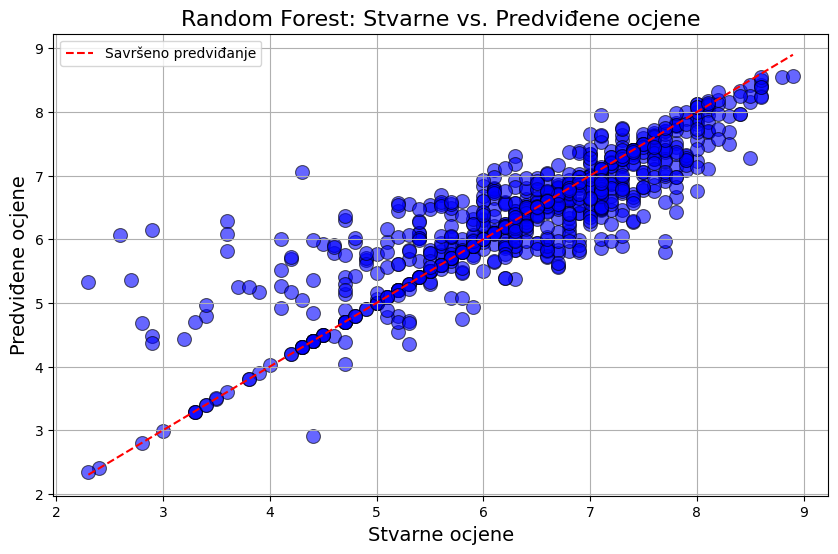

In [43]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', edgecolor='black', alpha=0.6, s=100)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Savršeno predviđanje")

plt.xlabel("Stvarne ocjene", fontsize=14)
plt.ylabel("Predviđene ocjene", fontsize=14)
plt.title("Random Forest: Stvarne vs. Predviđene ocjene", fontsize=16)

plt.grid(True)

plt.legend()

plt.show()


## === 7. Validacija rezultata ===
### Poređenje sa Linear Regression modelom

Ovdje se evaluira izvedba Linear Regression modela koristeći razne metrike:

- **`lr_pipeline.fit(X_train, y_train)`**: Model se trenira na skupu podataka za trening (`X_train` i `y_train`).
- **`y_pred_lr = lr_pipeline.predict(X_test)`**: Predviđanja se generiraju za testni skup podataka (`X_test`).

#### Evaluacijske metrike:

1. **Mean Squared Error (MSE)**: 
   - Mjera prosječne kvadratne greške između stvarnih i predviđenih ocjena. Niža vrijednost ukazuje na bolju tačnost modela.
   
2. **R2 Score**:
   - Mjera koliko varijacije stvarnih podataka model može objasniti. Vrijednost 1 označava savršeno objašnjenje podataka, dok negativne vrijednosti označavaju loše predviđanje.
   
3. **Mean Absolute Error (MAE)**:
   - Prosječna apsolutna greška između stvarnih i predviđenih ocjena. Manje vrijednosti ukazuju na bolju preciznost modela.

4. **Root Mean Squared Error (RMSE)**:
   - Korijen iz MSE, koji daje uvid u prosječnu grešku  u istim jedinicama kao i originalni podaci.

Ove metrike pomažu u razumijevanju tačnosti i performansi modela Linear Regression u predviđanju ocjena.

In [44]:
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("\n=== Evaluacija Linear Regression modela ===")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")


=== Evaluacija Linear Regression modela ===
Mean Squared Error: 0.69
R2 Score: 0.50
Mean Absolute Error: 0.63
Root Mean Squared Error: 0.83


### Vizualizacija poređenja
Ovaj graf prikazuje usporedbu distribucije stvarnih ocjena i predviđenih ocjena kroz dva modela:

- **Stvarne ocjene** (plava linija) predstavljaju raspodjelu stvarnih ocjena u testnom skupu podataka (`y_test`).
- **Predviđene ocjene (Random Forest)** (narandžasta linija) predstavljaju raspodjelu predviđenih ocjena koje je generisao Random Forest model (`y_pred_rf`).
- **Predviđene ocjene (Linear Regression)** (zelena linija) predstavljaju raspodjelu predviđenih ocjena koje je generisao Linear Regression model (`y_pred_lr`).

Ovaj graf omogućava usporedbu distribucija predviđenih i stvarnih ocjena te daje uvid u to koliko su predviđene ocjene za oba modela slične stvarnim ocjenama.

#### Postavke grafa:
- **`sns.kdeplot()`**: Koristi se za izračunavanje i prikazivanje gustoće vjerovatnoće za svaki skup podataka (stvarne i predviđene ocjene).
- **`fill=True`**: Ispunjava područje ispod linije gustoće.
- **`alpha`**: Određuje prozirnost boje za svaku liniju kako bi se lakše razlikovale.
- **`linewidth=2`**: Povećava debljinu linije za bolju vidljivost.
- **`plt.legend()`**: Dodaje legendu na grafu za lakše prepoznavanje linija.
- **`plt.grid(True)`**: Dodaje mrežu na graf za bolju čitljivost.

Graf je korisna vizualizacija za usporedbu kako dobro različiti modeli (Random Forest i Linear Regression) predviđaju stvarne ocjene u odnosu na njihovu distribuciju.

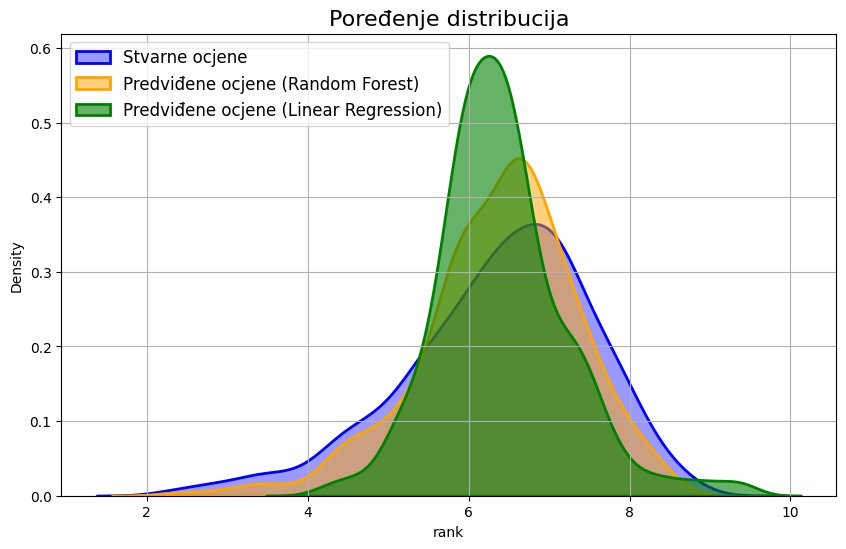

In [45]:
plt.figure(figsize=(10, 6))

sns.kdeplot(y_test, label="Stvarne ocjene", fill=True, color='blue', alpha=0.4, linewidth=2)

sns.kdeplot(y_pred_rf, label="Predviđene ocjene (Random Forest)", fill=True, color='orange', alpha=0.5, linewidth=2)

sns.kdeplot(y_pred_lr, label="Predviđene ocjene (Linear Regression)", fill=True, color='green', alpha=0.6, linewidth=2)

plt.legend(fontsize=12)

plt.title("Poređenje distribucija", fontsize=16)

plt.grid(True)

plt.show()


## === 8. Hyperparametarska optimizacija ===
### Grid Search za Random Forest model
U ovom kodu koristi se **Grid Search** za pronalaženje optimalnih hiperparametara za **Random Forest Regressor** unutar `rf_pipeline`. Hiperparametri koji se optimiziraju su:

- **`n_estimators`**: Broj stabala u Random Forest modelu. Testiraju se dvije vrijednosti: 100 i 200.
- **`max_depth`**: Maksimalna dubina svakog stabla. Razmatraju se tri opcije: `None` (bez ograničenja dubine), 10 i 20.
- **`min_samples_split`**: Minimalan broj uzoraka potreban za podjelu čvora. Razmatraju se dvije opcije: 2 i 5.

#### Parametri `GridSearchCV`:
- **`param_grid`**: Definira vrijednosti koje će biti testirane za svaki hiperparametar.
- **`cv=5`**: Koristi 5-struku unakrsnu validaciju za procjenu performansi modela.
- **`scoring='neg_mean_squared_error'`**: Cilj je minimizirati negativnu srednju kvadratnu pogrešku (negativna jer je standard za **GridSearchCV** da maksimalizira rezultate).
- **`n_jobs=-1`**: Korištenje svih dostupnih procesora za paralelno izvođenje grid searcha, čime se ubrzava proces.

#### Funkcionalnost:
- **`grid_search.fit(X_train, y_train)`**: Pokreće Grid Search za treniranje modela koristeći različite kombinacije hiperparametara i traži onu koja daje najbolji rezultat prema negativnoj srednjoj kvadratnoj pogrešci (MSE).
- Ovaj proces omogućava optimizaciju performansi modela pronalaženjem najboljih parametara za Random Forest.

Nakon izvršavanja Grid Search-a, najbolji parametri mogu biti pristupljeni putem `grid_search.best_params_`, a najbolji model putem `grid_search.best_estimator_`.

In [46]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

### Ispis najboljih parametara
Ovaj kod ispisuje najbolje hiperparametre koje je GridSearchCV pronašao za **Random Forest** model. Nakon što se Grid Search završi, najbolji parametri mogu biti dohvaćeni pomoću `grid_search.best_params_`, što daje skup hiperparametara koji su dali najbolje rezultate prema definisanom kriteriju (u ovom slučaju, minimizacija negativne srednje kvadratne pogreške).

#### Funkcija:
- **`grid_search.best_params_`**: Vraća optimalnu kombinaciju vrijednosti hiperparametara koja je dala najbolji rezultat u procesu pretrage.

Korištenjem ovih najboljih parametara možemo poboljšati performanse Random Forest modela i koristiti ga za predviđanja s boljim rezultatima.

In [47]:
print("\n=== GridSearchCV za Random Forest ===")
print("Najbolji parametri:", grid_search.best_params_)


=== GridSearchCV za Random Forest ===
Najbolji parametri: {'regressor__max_depth': 20, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}


### Predikcija sa najboljim modelom
U ovom koraku koriste se najbolji parametri koji su dobijeni iz GridSearchCV za treniranje optimiziranog **Random Forest** modela. Nakon što se dobiju najbolji hiperparametri, predviđanja na testnom skupu podataka se vrše koristeći `best_estimator_`, koji sadrži model sa najboljim parametrima.

#### Funkcija:
- **`grid_search.best_estimator_`**: Dohvata najbolje trenirani model sa najboljim hiperparametrima.
- **`best_rf_model.predict(X_test)`**: Koristi optimizirani model za predviđanje ciljne varijable (`rank`) na testnom skupu podataka.

Ova predviđanja možemo koristiti za daljnje evaluacije modela i usporedbu sa stvarnim vrijednostima.

In [48]:
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

### Evaluacija sa najboljim modelom
Nakon što se optimizira **Random Forest** model korištenjem **GridSearchCV**, evaluira se njegova učinkovitost na testnom skupu podataka. Evaluacija uključuje nekoliko ključnih mjera koje nam pomažu razumjeti kvalitetu predviđanja.

#### Evaluacija uključuje sljedeće metrike:
1. **Mean Squared Error (MSE)**: Mjera razlike između stvarnih i predviđenih vrijednosti. Niža vrijednost označava bolje performanse modela.
2. **R2 Score (Koeficijent determinacije)**: Pokazuje koliko dobro model objašnjava varijaciju u podacima. Vrijednost bliža 1 znači bolju preciznost.
3. **Mean Absolute Error (MAE)**: Mjera prosječne apsolutne greške između stvarnih i predviđenih vrijednosti.
4. **Root Mean Squared Error (RMSE)**: Kvadratni korijen MSE koji također pokazuje veličinu greške, ali u istoj mjernoj jedinici kao originalni podaci.

Evaluacijski rezultati omogućuju nam da procijenimo koliko dobro optimizirani model predviđa ciljne varijable.

In [49]:
print("\n=== Evaluacija najboljeg Random Forest modela ===")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_best_rf):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_best_rf):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_best_rf):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_best_rf)):.2f}")


=== Evaluacija najboljeg Random Forest modela ===
Mean Squared Error: 0.33
R2 Score: 0.76
Mean Absolute Error: 0.35
Root Mean Squared Error: 0.58


### Vizualizacija poboljšanja
Grafički prikaz poređenja stvarnih i predviđenih ocjena s optimiziranim **Random Forest** modelom daje vizualni uvid u to koliko su tačne prognoze u odnosu na stvarne vrijednosti.

#### Detalji prikaza:
- **Stvarne ocjene (x-osa)** naspram **predviđenih ocjena (y-osa)** na testnom skupu podataka.
- Crvena isprekidana linija označava "savršeno predviđanje" (gdje su stvarne i predviđene ocjene jednake).
- Razmještaj tačaka oko ove linije pokazuje koliko su predviđanja modela bliska stvarnim ocjenama.

Ovaj grafikon daje dobar vizualni prikaz preciznosti modela.

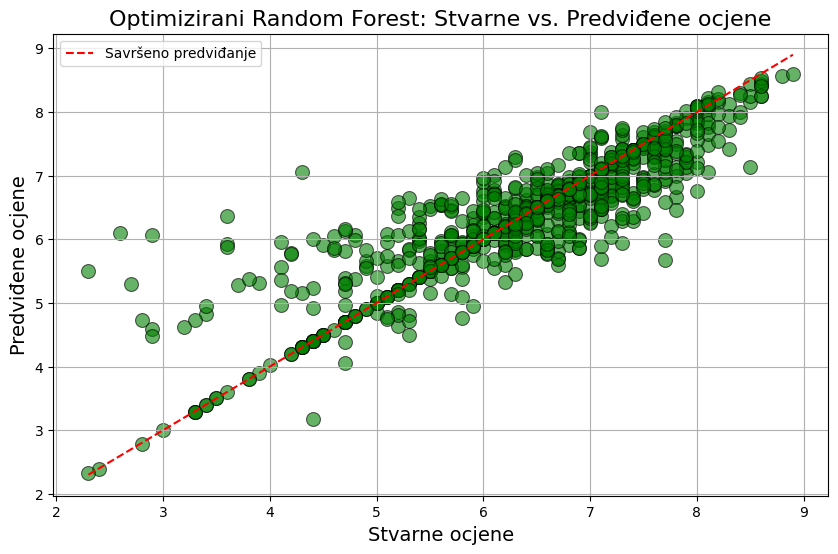

In [50]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred_best_rf, color='green', edgecolor='black', alpha=0.6, s=100)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Savršeno predviđanje")

plt.xlabel("Stvarne ocjene", fontsize=14)
plt.ylabel("Predviđene ocjene", fontsize=14)
plt.title("Optimizirani Random Forest: Stvarne vs. Predviđene ocjene", fontsize=16)

plt.grid(True)

plt.legend()

plt.show()